In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (4).csv


In [ ]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Drop rows where 'title', 'country', or 'date_added' are missing
df = df.dropna(subset=['title', 'country', 'date_added'])


In [ ]:
df['rating'] = df['rating'].fillna('Unknown')


In [ ]:
# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract release year
df['release_year'] = df['date_added'].dt.year

# Check results
df[['title', 'date_added', 'release_year']].head()


,title,date_added,release_year
0,Dick Johnson Is Dead,2021-09-25,2021.0
1,Blood & Water,2021-09-24,2021.0
4,Kota Factory,2021-09-24,2021.0
7,Sankofa,2021-09-24,2021.0
8,The Great British Baking Show,2021-09-24,2021.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set plot style
sns.set(style="whitegrid")


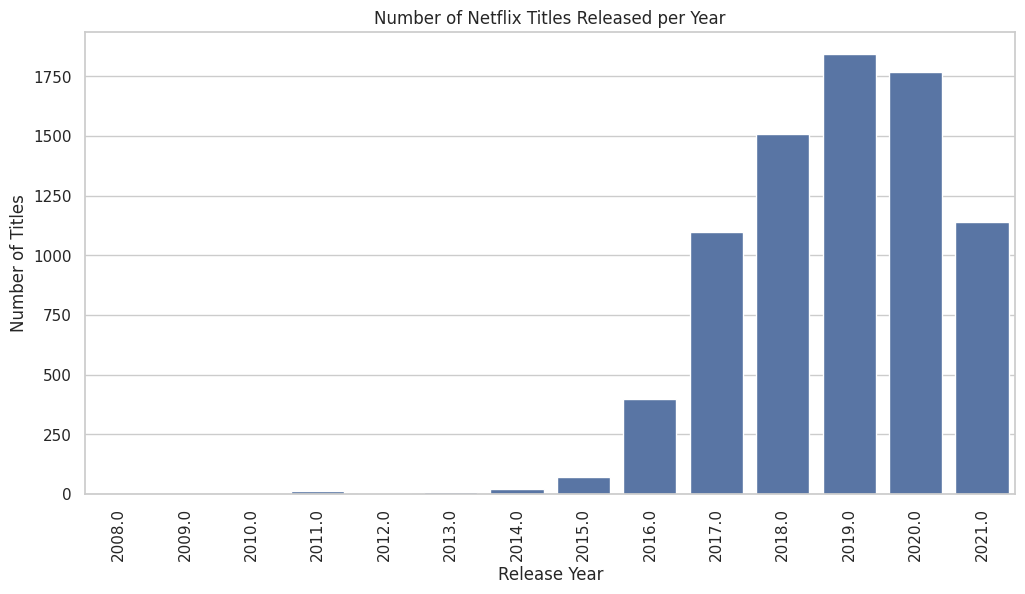

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Number of Netflix Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


/tmp/ipython-input-3592775218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


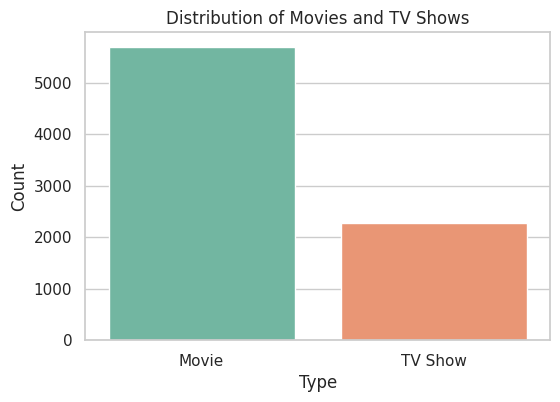

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-2406396710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


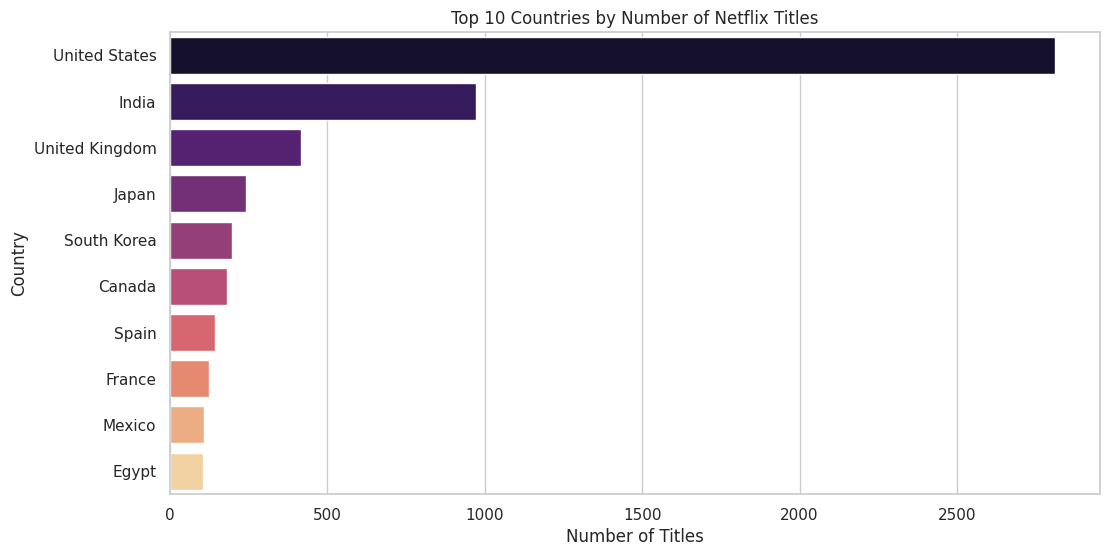

In [ ]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


/tmp/ipython-input-1229689711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


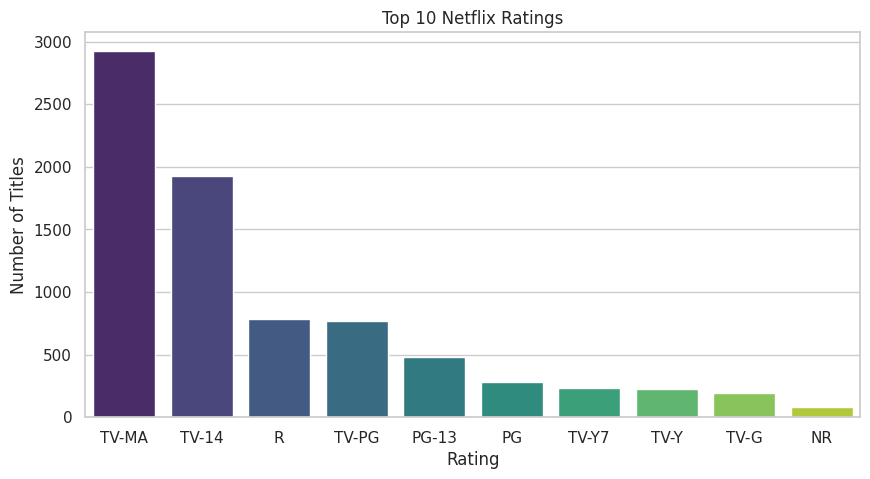

In [ ]:
plt.figure(figsize=(10,5))
rating_counts = df['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Top 10 Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
import numpy as np

# Simulate IMDb ratings between 5.0 and 9.0
np.random.seed(42)  # for reproducibility
df['imdb_rating'] = np.round(np.random.uniform(5.0, 9.0, df.shape[0]), 1)

# Check
df[['title', 'imdb_rating']].head()


,title,imdb_rating
0,Dick Johnson Is Dead,6.5
1,Blood & Water,8.8
4,Kota Factory,7.9
7,Sankofa,7.4
8,The Great British Baking Show,5.6


In [ ]:
# Make a copy for modeling
model_df = df.copy()

# Encode 'type' and 'rating' as dummy variables
model_df = pd.get_dummies(model_df, columns=['type', 'rating'], drop_first=True)

# Drop non-useful columns and the original 'duration' column
model_df = model_df.drop(columns=['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'description', 'duration'])

# Drop rows with missing values (if any)
model_df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = model_df.drop('imdb_rating', axis=1)
y = model_df['imdb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_df = df.copy()

# Drop unused and non-numeric columns
model_df = model_df.drop(columns=[
    'show_id', 'title', 'director', 'cast', 'country', 'date_added', 'description', 'duration'
])

# Fill any remaining missing values
model_df.dropna(inplace=True)

# Convert 'type' and 'rating' to dummy variables
model_df = pd.get_dummies(model_df, columns=['type', 'rating'], drop_first=True)


In [ ]:
model_df.dtypes  # Should show only float or int columns now


,0
release_year,float64
listed_in,object
imdb_rating,float64
duration_mins,float64
type_TV Show,bool
rating_NC-17,bool
rating_NR,bool
rating_PG,bool
rating_PG-13,bool
rating_R,bool


In [ ]:
# Clean 'duration' column: extract numbers only (e.g., '90 min' → 90)
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Make a fresh copy
model_df = df.copy()

# Extract numeric duration in minutes
model_df['duration_mins'] = model_df['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Drop only the columns that exist in model_df
columns_to_drop = ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'description', 'duration']

# Keep only columns that are present
existing_columns = [col for col in columns_to_drop if col in model_df.columns]

# Drop them
model_df = model_df.drop(columns=existing_columns)


In [ ]:
# Convert 'type' and 'rating' into dummy variables
model_df = pd.get_dummies(model_df, columns=['type', 'rating'], drop_first=True)


In [ ]:
# Remove rows with any remaining nulls
model_df = model_df.dropna()


In [ ]:
model_df.dtypes


,0
release_year,float64
listed_in,object
imdb_rating,float64
duration_mins,float64
type_TV Show,bool
rating_74 min,bool
rating_84 min,bool
rating_G,bool
rating_NC-17,bool
rating_NR,bool


In [ ]:
# Drop the remaining non-numeric column
if 'listed_in' in model_df.columns:
    model_df = model_df.drop(columns=['listed_in'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split
X = model_df.drop('imdb_rating', axis=1)
y = model_df['imdb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, name):
    print(f"📊 {name} Evaluation")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R² Score:", round(r2_score(y_true, y_pred), 2))

evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📊 Random Forest Regressor Evaluation
MAE: 1.06
RMSE: 1.27
R² Score: -0.22
